<a href="https://colab.research.google.com/github/victorncg/rascunhos/blob/main/CRIA%C3%87%C3%83O_DE_FUN%C3%87%C3%83O_PARA_EXTRA%C3%87%C3%83O_DE_TODOS_OS_FUNDOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "300">

# **Como extrair dados de cotas de fundos sem baixar nenhum arquivo**

## 0. Apresentação

Sobre a CVM: https://www.gov.br/cvm/pt-br/acesso-a-informacao-cvm/institucional/sobre-a-cvm






---







Uma das maiores dificuldades em lidar com dados da CVM é pela forma em que eles são disponibilizados.

A CVM disponibiliza diversos dados do mercado financeiro nacional, como dados cadastrais, dos balanços e demonstrativos das empresas, demonstrativos de fundos imobiliários, dados de desempenho de fundos multimercado, dentre outros.

Plataforma de dados da CVM: https://dados.cvm.gov.br/

**O que encontramos lá dentro?**

Normalmente estes dados são disponibilizados como arquivos zipados (.zip) e dentro destas pastas zipadas nós encontramos um ou vários arquivos .csv.

E daí que vem o problema. Se precisarmos analisar vários destes arquivos ao mesmo tempo, precisamos baixá-los, para depois descompactá-los e juntá-los em algum lugar, como em uma planilha do Excel.

Só então é que conseguimos organizar os dados, ajustar o formato das colunas e realizar alguma análise.

Para ficar mais claro, aí vai um exemplo:
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Este é o repositório da CVM que contém os dados de cotas para todos os fundos do Brasil.

Repare que cada link é o arquivo para um determinado mês de um determinado ano... e cada um desses é um .zip contendo um .csv único! Imagine agora que você quisesse analisar o desempenho da cota de um fundo em um período amplo de tempo, como alguns anos...

Você teria que baixar um por um desses arquivos, depois juntar tudo, ou seja, literalmente empilhar para ter uma base de dados só!

**E qual a solução?**

Felizmente, o Python nos ajuda muito neste processo.

Existem algumas bibliotecas que vão nos ajudar a obter, processar e analisar esses dados.


Por exemplo, com a biblioteca pandas, podemos obter os dados diretamente, sem a necessidade de baixar ou descompactar o .zip.

Acompanhe!

## 1. Importação das bibliotecas

Para esta tarefa, vamos precisar apenas da biblioteca pandas

In [1]:
import pandas as pd

## 2. Exploração dos dados

Vamos obter algum dos arquivos desta página aqui: https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Esta página contém os dados históricos de desempenho dos fundos de investimento do Brasil.

Temos dados como valor da cota, valor do PL, número de cotistas, dentre outros.

Se você pretende analisar o retorno dos fundos de investimento, é com essa base de dados que você precisa trabalhar.

Abaixo, mostro uma figura ilustrativa dos dados que vamos obter:

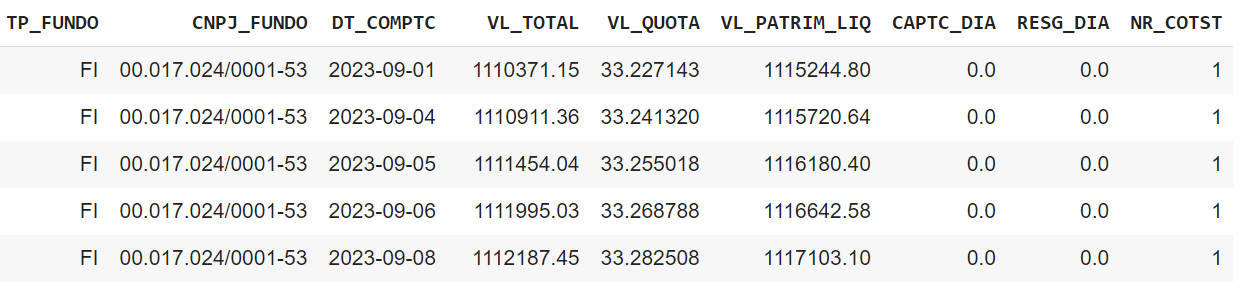

## 3. Realizando a extração dos dados

Especifique o nome do arquivo

In [ ]:
link = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202401.zip'

In [33]:
start = '202201'
end = '202404'

In [34]:
start_num = int(start[0:4])

In [35]:
start_num

2022

In [36]:
# Break when '201208'

b = list()

for year in range(start_num, 2024+1):

  for month in range(1,13):

    a = '{:02d}{:02d}'.format(year, month)

    if a == end:
      break

    print(a)

    b.append(a)

  if a == end:
      break

  year = year +1

202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202301
202302
202303
202304
202305
202306
202307
202308
202309
202310
202311
202312
202401
202402
202403


In [32]:
b

['202201',
 '202202',
 '202203',
 '202204',
 '202205',
 '202206',
 '202207',
 '202208',
 '202209',
 '202210',
 '202211',
 '202212',
 '202301',
 '202302',
 '202303',
 '202304',
 '202305',
 '202306',
 '202307',
 '202308',
 '202309',
 '202310',
 '202311',
 '202312',
 '202401',
 '202402']

In [ ]:
# Exiba 24 meses

year = 2012

# 2012 a 2014





201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201402
201503
201604
201705
201806
201907
202008
202109
202210
202311


In [ ]:
for i in range(1,12):
  print(f'2023{i}')

20231
20232
20233
20234
20235
20236
20237
20238
20239
202310
202311


In [2]:
def busca_informe_simples_cvm(ano, mes):
  url = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{:02d}{:02d}.zip'.format(ano, mes)
  return pd.read_csv(url, sep=';', compression='zip')

In [4]:
lista = ['202301', '202302']

In [37]:
lista = b

Execução

In [39]:
import time
start_time = time.time()

# Initialize an empty list to store individual DataFrames
dataframes = []

# Iterate through the files in the folder
for i in lista:

  url_pre = f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{i}.zip'

  df_loc = pd.read_csv(url_pre, sep=';', compression='zip')

  print("Capturando os dados do mês ",i," da extração")

  # Append the DataFrame to the list
  dataframes.append(df_loc)

# Combine all DataFrames in the list into one large DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

print("--- %s seconds ---" % (time.time() - start_time))

Capturando os dados do mês  202201  da extração
Capturando os dados do mês  202202  da extração
Capturando os dados do mês  202203  da extração
Capturando os dados do mês  202204  da extração
Capturando os dados do mês  202205  da extração
Capturando os dados do mês  202206  da extração
Capturando os dados do mês  202207  da extração
Capturando os dados do mês  202208  da extração
Capturando os dados do mês  202209  da extração
Capturando os dados do mês  202210  da extração
Capturando os dados do mês  202211  da extração
Capturando os dados do mês  202212  da extração
Capturando os dados do mês  202301  da extração
Capturando os dados do mês  202302  da extração
Capturando os dados do mês  202303  da extração
Capturando os dados do mês  202304  da extração
Capturando os dados do mês  202305  da extração
Capturando os dados do mês  202306  da extração
Capturando os dados do mês  202307  da extração
Capturando os dados do mês  202308  da extração
Capturando os dados do mês  202309  da e

In [40]:
combined_df

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2022-01-03,1075476.00,28.110273,1078462.74,0.0,0.00,1
1,FI,00.017.024/0001-53,2022-01-04,1075873.10,28.118682,1078785.36,0.0,0.00,1
2,FI,00.017.024/0001-53,2022-01-05,1076280.19,28.127768,1079133.95,0.0,0.00,1
3,FI,00.017.024/0001-53,2022-01-06,1076680.92,28.137115,1079492.53,0.0,0.00,1
4,FI,00.017.024/0001-53,2022-01-07,1073899.79,28.146295,1076721.79,0.0,3122.94,1
...,...,...,...,...,...,...,...,...,...
13389143,FI,97.929.213/0001-34,2024-03-01,85866589.60,11.765218,84569979.22,0.0,0.00,2
13389144,FI,97.929.213/0001-34,2024-03-04,85797673.30,11.755639,84501119.19,0.0,0.00,2
13389145,FI,97.929.213/0001-34,2024-03-05,85826520.89,11.759572,84529395.37,0.0,0.00,2
13389146,FI,97.929.213/0001-34,2024-03-06,85987087.79,11.781831,84689390.75,0.0,0.00,2


## Filtrando um fundo específico

In [41]:
fundo = combined_df[combined_df['CNPJ_FUNDO']=='97.929.213/0001-34']

In [42]:
fundo.shape

(546, 9)

In [43]:
fundo.index = fundo.DT_COMPTC

In [44]:
fundo.index = pd.to_datetime(fundo.index)

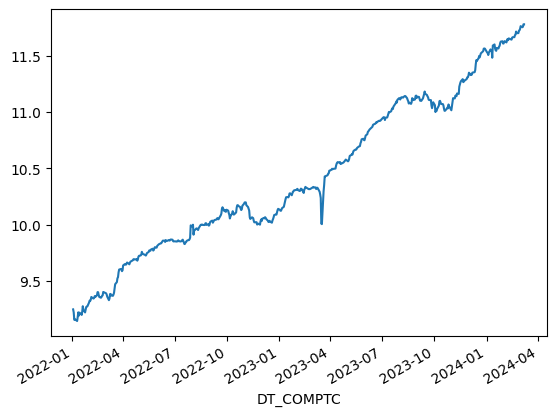

In [45]:
fundo.VL_QUOTA.plot();

In [47]:
medias_fundos = combined_df.groupby(by='CNPJ_FUNDO', axis = 0).mean()

<ipython-input-47-a4e4ae70c6c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medias_fundos = combined_df.groupby(by='CNPJ_FUNDO', axis = 0).mean()


Qual o fundo de maior patrimônio líquido?

In [51]:
medias_fundos.sort_values('VL_PATRIM_LIQ', ascending = False).head(10)

,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
CNPJ_FUNDO,,,,,,
07.593.972/0001-86,1.415207e+11,5.409349,1.415205e+11,5.019939e+08,4.720940e+08,290.847985
46.133.770/0001-03,1.261913e+11,110.339495,1.261905e+11,2.830644e+09,2.543103e+09,1.000000
42.592.315/0001-15,1.146619e+11,1.122379,1.146604e+11,2.688451e+09,2.288651e+09,29714.637363
00.822.055/0001-87,1.027470e+11,48.897018,1.027460e+11,5.600910e+07,5.981409e+07,1.001832
27.146.328/0001-77,9.968775e+10,1.453948,9.968703e+10,2.671138e+09,2.775336e+09,10.554945
01.597.187/0001-15,9.768394e+10,298.636041,9.769317e+10,8.216319e+08,8.621388e+08,47.543956
01.608.573/0001-65,9.615857e+10,17.818203,9.615206e+10,2.155706e+09,2.415963e+09,36.990842
42.592.302/0001-46,6.604199e+10,1.039479,6.604217e+10,2.058049e+09,2.240862e+09,1.009009
10.583.909/0001-73,5.860690e+10,3.463509,5.861018e+10,7.932518e+07,2.215670e+07,72.823853


Vamos explorar algum outro fundo

Exemplo: SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS

CNPJ: 08.336.054/0001-34

https://www.sicredi.com.br/site/investimentos/fundos-investimentos/fi-acoes-petrobras/

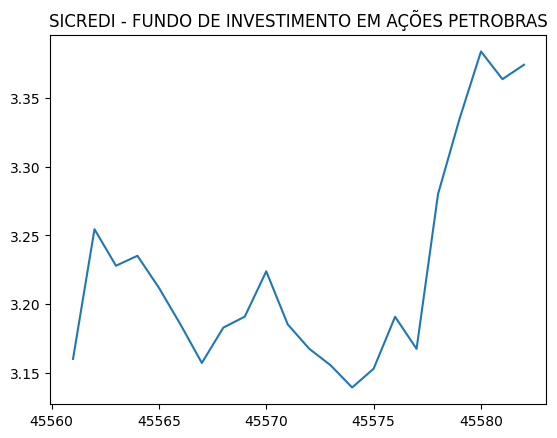

In [ ]:
fundo = dados[dados['CNPJ_FUNDO'] == '08.336.054/0001-34']

fundo.VL_QUOTA.plot(title = 'SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS');